<a href="https://colab.research.google.com/github/Harsha194/Elevate_Labs_Tasks/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

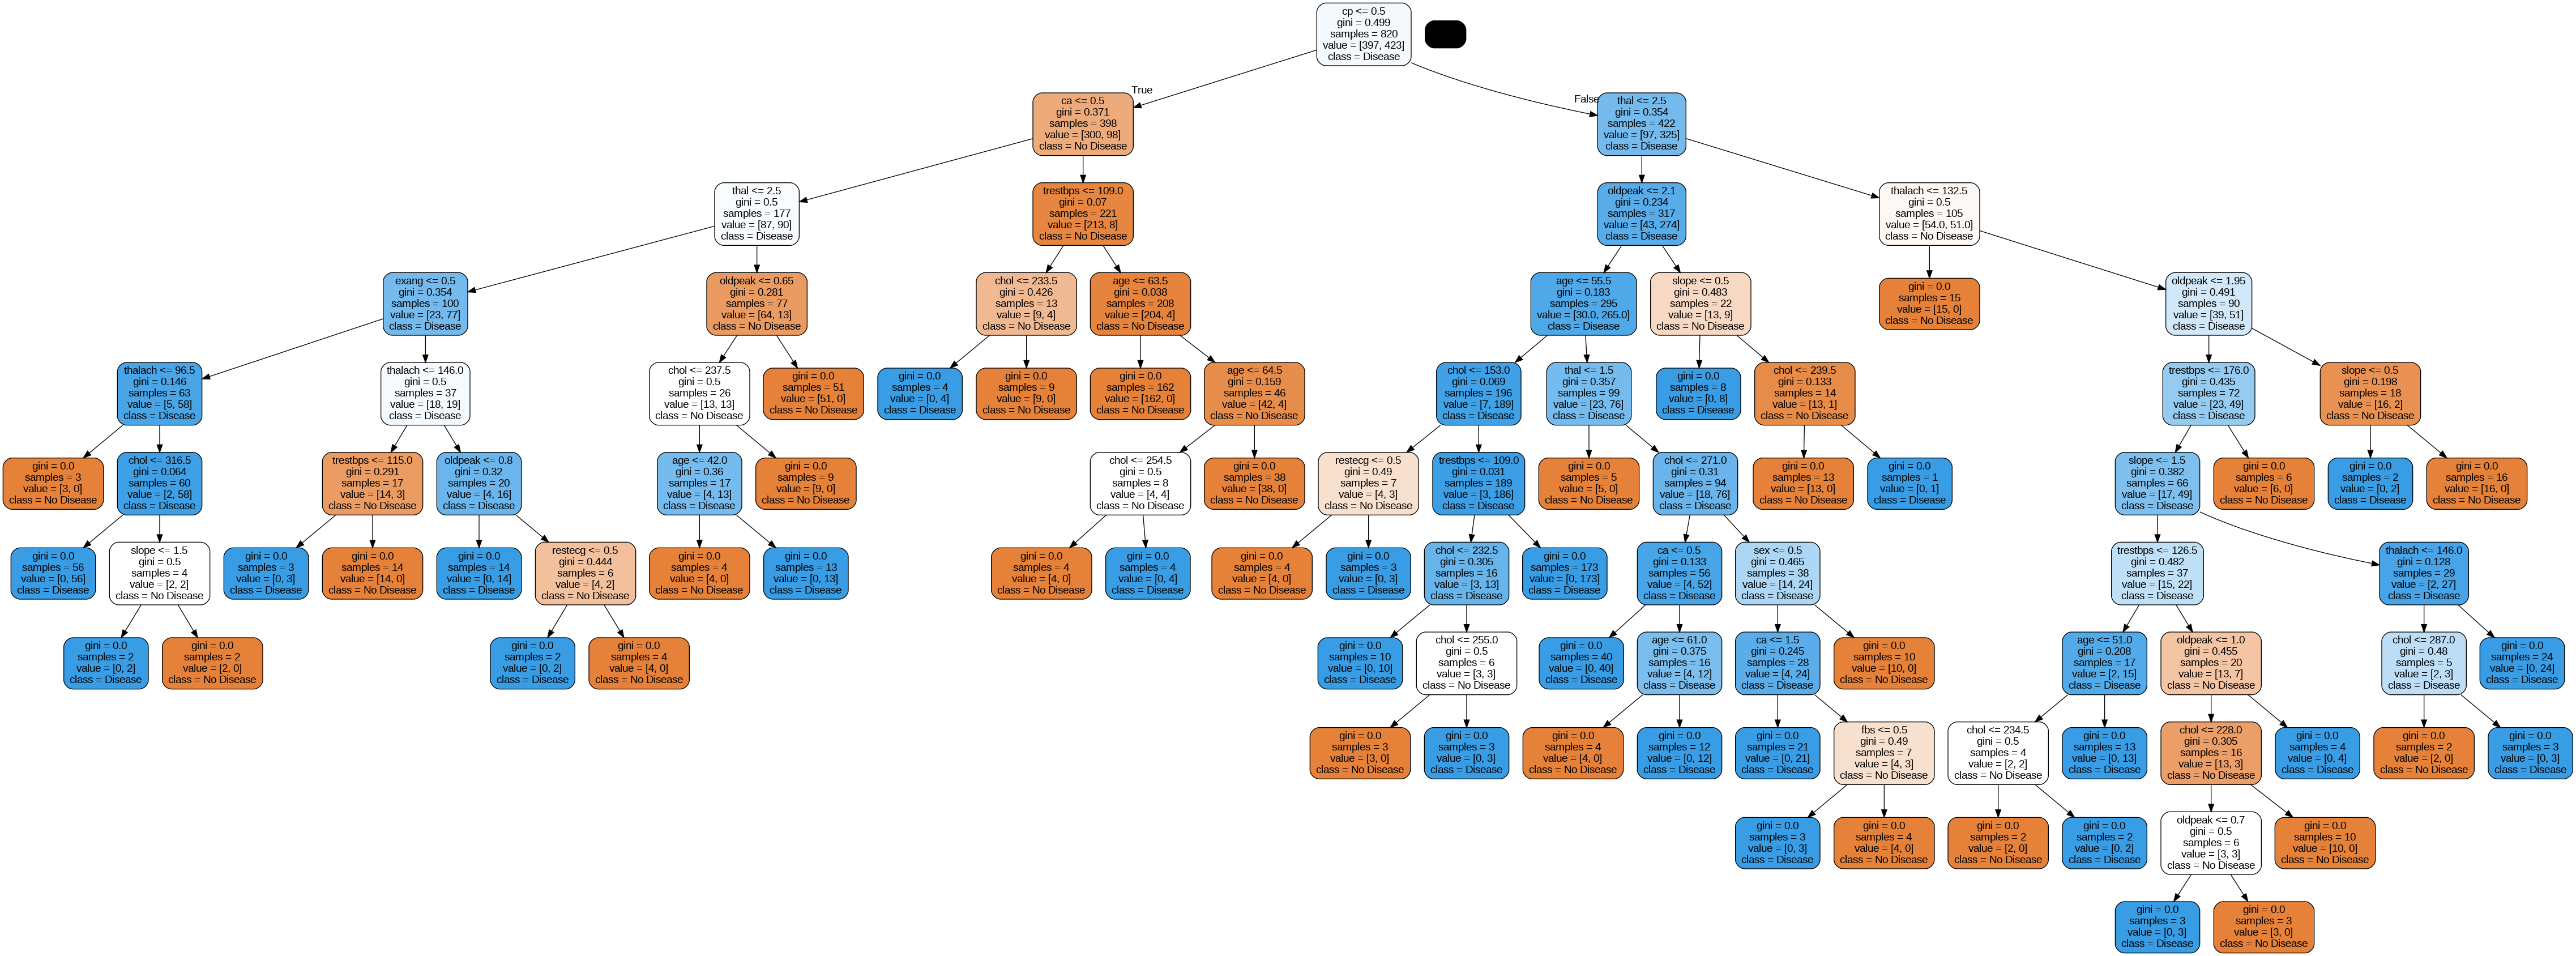

Decision Tree Accuracy with max_depth=4: 0.8000
Random Forest Accuracy: 0.9854


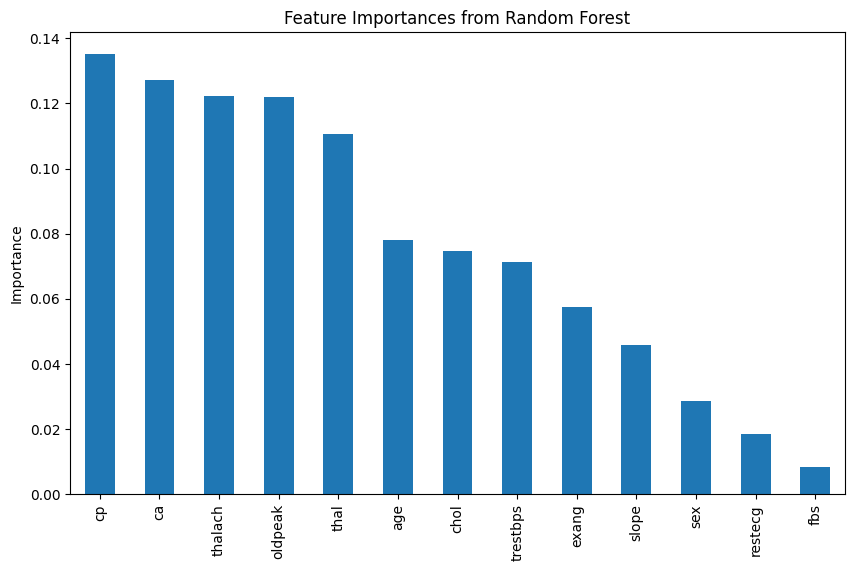

Decision Tree CV Accuracy: 1.0000 (+/- 0.0000)
Random Forest CV Accuracy: 0.9971 (+/- 0.0117)


In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from six import StringIO
import pydotplus
from IPython.display import Image
import matplotlib.pyplot as plt


heart_data = pd.read_csv('heart.csv')


X = heart_data.drop('target', axis=1)
y = heart_data['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns, class_names=['No Disease', 'Disease'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decision_tree.png')
display(Image(graph.create_png()))


clf_depth = DecisionTreeClassifier(max_depth=4, random_state=42)
clf_depth.fit(X_train, y_train)
accuracy_depth = clf_depth.score(X_test, y_test)
print(f"Decision Tree Accuracy with max_depth=4: {accuracy_depth:.4f}")


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")


importances = rf.feature_importances_
feat_names = X_train.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.plot(kind='bar')
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance')
plt.show()


scores_tree = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"Decision Tree CV Accuracy: {scores_tree.mean():.4f} (+/- {scores_tree.std()*2:.4f})")

scores_rf = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(f"Random Forest CV Accuracy: {scores_rf.mean():.4f} (+/- {scores_rf.std()*2:.4f})")
